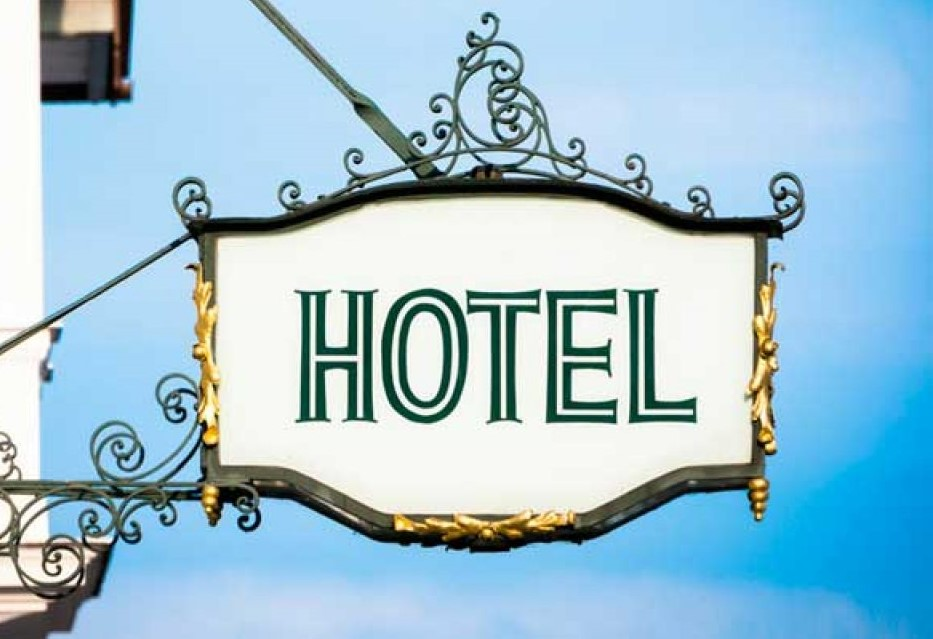

# Caso de Estudio: Análisis  de Reservaciones Hotel

Por medio del conjunto de datos obtenidos a partir de las reservaciones realizadas en dos diferentes hoteles situados en Portugal (City Hotel & Resort Hotel) se mostrará un análisis para ver el comportamiento de los clientes.

## Información e importación de los datos

### Se importan las librerias que se van a trabajar

In [3]:
%run common.py

### Se realiza la conexión para obtener los datos

In [8]:
responseapi = requests.get('https://analytics.deacero.com/api/teenus/get-data/c744a2a4-ab89-5432-b5e6-9f320162e160')

In [9]:
data = responseapi.json()
df = pd.DataFrame(data)

### Transformación de .JSON a .XLSX

In [10]:
#Hay columnas con valores 'null' y en este formato es mas facil manejarlo.
df.to_excel(r'C:\Users\esalazarl\Analisis\data.xlsx')

Exception ignored in: <function ZipFile.__del__ at 0x000002498593DA60>
Traceback (most recent call last):
  File "C:\Users\esalazarl\Anaconda3\lib\zipfile.py", line 1807, in __del__
  File "C:\Users\esalazarl\Anaconda3\lib\zipfile.py", line 1824, in close
ValueError: seek of closed file


In [477]:
#Se utiliza na_values para que pandas considere #N/A, -NaN, -n/a, N/A, NULL etc como valor NaN
valornull = ['Undefined']
df = pd.read_excel(r'C:\Users\esalazarl\Analisis\data.xlsx',na_values=valornull)

### Información de las variables

In [478]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unnamed: 0                      119390 non-null  int64  
 1   hotel                           119390 non-null  object 
 2   is_canceled                     119390 non-null  int64  
 3   lead_time                       119390 non-null  int64  
 4   arrival_date_year               119390 non-null  int64  
 5   arrival_date_month              119390 non-null  object 
 6   arrival_date_week_number        119390 non-null  int64  
 7   arrival_date_day_of_month       119390 non-null  int64  
 8   stays_in_weekend_nights         119390 non-null  int64  
 9   stays_in_week_nights            119390 non-null  int64  
 10  adults                          119390 non-null  int64  
 11  children                        119386 non-null  float64
 12  babies          

### Reporte de variables

In [479]:
#Con la finalidad de poder tener una mayor visualización de las variables realizamos un reporte, posteriormente se exporta en HTML, informe que se encuentra dentro de la carpeta.
prof = ProfileReport(df)
prof.to_file(output_file='Variables_hotel.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\esalazarl\Anaconda3\lib\site-packages\scipy\stats\stats.py:4812: RuntimeWarning:

overflow encountered in longlong_scalars



Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [98]:
df.describe()

,Unnamed: 0,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,...,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,59694.500000,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,...,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,34465.068657,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,...,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,29847.250000,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,59694.500000,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,89541.750000,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,119389.000000,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,...,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


## Limpieza de los datos

In [480]:
#Se buscan los nulos con la finalidad de limpiar los datos
df.isnull().sum()

Unnamed: 0                             0
hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                1169
country                              488
market_segment                         2
distribution_channel                   5
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent           

Encontramos nulos dentro de las columnas: Children, Meal, Country, Agent, Company, Market_Segment, Distribution_Channel.

In [481]:
#Se buscan los valores únicos de cada columna
for i in df.columns:
    print(i+' -> \n',df[i].unique())
    print('\n','-_'*25)

Unnamed: 0 -> 
 [     0      1      2 ... 119387 119388 119389]

 -_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_
hotel -> 
 ['City Hotel' 'Resort Hotel']

 -_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_
is_canceled -> 
 [1 0]

 -_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_
lead_time -> 
 [615  25   0 176 246   3 121  85 129 123 197 205  27  53  77 131  96  52
  26  86 169 187  72 143 262 111  98 276  67   7 114 122  16  64  70  50
  47  73 175  66 120  74  60 200 238 168 108   8  24   6  37  92  29  59
 130  55  45   2  97 146  20  28 259 109  54  56  12  30  11  19 391  40
 177  31 163  39  76  41  42  91  95 250  63  58  88 174 279 258 286   9
 132 154 159 180 285 284 256  87  93  51 212 605 192  61 144 167 102  75
 172 199 206  10 134  68 223  82 224 166 158  65 101 135 156  35 106 155
 161 133  89 160  32 195  21  99 127 148 150  38 230 162 384  49 149 196
 207 202 379  14 208 292 100 164 213 193 209 226 178 152 125 171 105  17
 185   4 104 210  78 216 217  43 112 103 

In [482]:
#Comenzamos a remover los nulos con la columna de Children, sustituimos los valores nulos con la media.
df["children"].fillna(value = df["children"].mean(),inplace=True)
df["children"]=df["children"].apply(np.floor)
print(f"Valores faltantes en la columna de children: {np.sum(df.children.isnull())}")

Valores faltantes en la columna de children: 0


In [483]:
#En caso de market_segment, distribution_channel, meal, country y agent utilizamos el método bfill para sustituir los valores NULL por los valores de la siguiente fila.
arr=["market_segment", "distribution_channel", "meal", "country", "agent"]
print("Valores faltantes en las siguientes columnas:")
for x in arr:
    df[x].fillna(method="bfill", inplace=True)
    print(f"{x}: {np.sum(df[x].isnull())}")

Valores faltantes en las siguientes columnas:
market_segment: 0
distribution_channel: 0
meal: 0
country: 0
agent: 0


In [484]:
#En el caso de company debido a la alta cantidad de valores nulos que tiene, sustituimos los valores por 0 
df['company'] = df['company'].replace(np.nan, 0)
print(f"Valores faltantes en la columna de company: {np.sum(df.company.isnull())}")

Valores faltantes en la columna de company: 0


In [485]:
#Verificamos que ya no se encuentren nulos en ninguna columna
df.isnull().sum()

Unnamed: 0                        0
hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type               

In [105]:
#Verificamos que no existan filas duplicadas
df[df.duplicated()].shape

(0, 33)

Ya no se encuentran nulos ni duplicados dentro de las columnas del df

In [486]:
#Eliminamos la variable Unnamed: 0 debido a que no aporta datos relevantes para el análisis.
df.drop('Unnamed: 0', axis=1, inplace=True)

### Fechas

Cambiamos el tipo de dato de "reservation_status_date" de tipo objeto a tipo fecha

In [342]:
#Cambio del tipo de dato
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [487]:
#Creación de la variable "arrival date" con la finalidad de tenerlo en tipo fecha
df['arrival_date'] = pd.to_datetime(df.arrival_date_year.astype(str) + '/' + df.arrival_date_month.astype(str) + '/' + df.arrival_date_day_of_month.astype(str))
df['arrival_date']

0        2017-03-16
1        2017-03-16
2        2017-03-16
3        2017-03-16
4        2017-03-16
            ...    
119385   2016-07-14
119386   2016-07-14
119387   2016-07-15
119388   2016-07-15
119389   2016-07-15
Name: arrival_date, Length: 119390, dtype: datetime64[ns]

In [488]:
#Verificamos que todas las variables se encuentren con el tipo adecuado.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119390 non-null  float64

Los datos se encuentran limpios para el analisis posterior.

## Análisis de los datos.

### ¿De dónde vienen los huéspedes?

In [436]:
df2 = (df['is_canceled'] == 0)
df3 = df[df2]
#Aplicamos un reset el index para que no aparezcan más filas de las que son en realidad. 
df3 = df3.reset_index()

In [437]:
#Los huéspedes vienen de los siguientes paises.
df3.country.unique()

array(['DEU', 'PRT', 'BEL', 'FRA', 'SVN', 'GBR', 'ESP', 'NOR', 'CHE',
       'CHL', 'POL', 'USA', 'IRL', 'ROU', 'OMN', 'ARG', 'CN', 'GRC',
       'ITA', 'NLD', 'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA',
       'FIN', 'MOZ', 'BWA', 'LUX', 'ALB', 'IND', 'CHN', 'MEX', 'MAR',
       'UKR', 'SMR', 'LVA', 'PRI', 'SRB', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'JAM', 'HRV', 'IRN', 'CAF', 'BGR', 'KAZ', 'LBN',
       'JPN', 'SVK', 'EGY', 'CMR', 'LIE', 'AZE', 'SAU', 'MMR', 'IRQ',
       'MYS', 'COL', 'DOM', 'VEN', 'TWN', 'NZL', 'PAN', 'PER', 'GEO',
       'TUN', 'JOR', 'SGP', 'TMP', 'CYP', 'MUS', 'ECU', 'BFA', 'IDN',
       'ARM', 'KEN', 'LKA', 'KWT', 'THA', 'MCO', 'LBY', 'GNB', 'MKD',
       'TZA', 'NGA', 'GIB', 'MLI', 'ARE', 'BGD', 'CUB', 'BIH', 'PHL',
       'BHR', 'COM', 'SUR', 'NAM', 'BOL', 'UGA', 'CIV', 'SYR', 'ISL',
       'MLT', 'URY', 'PAK', 'BDI', 'SYC', 'QAT', 'PRY', 'BRB', 'ABW',
       'AND', 'VNM', 

Debido a que la columna country nos muestra los paises como _código alpha 3_, creamos otra columna que muestre el nombre del país al que pertenece el código.

In [438]:
#Seleccionamos la variable de country y lo convertimos a nombre. 
country_name1 = df3['country']
country_name = coco.convert(names=country_name1, to='name_short')
country_name = pd.DataFrame(country_name)
country_name.columns = ['country_name']
country_name

TMP not found in ISO3
TMP not found in ISO3


,country_name
0,Germany
1,Portugal
2,Belgium
3,France
4,Germany
...,...
75161,Netherlands
75162,Portugal
75163,France
75164,Germany


In [460]:
country_name1 = df['country']
country_name = coco.convert(names=country_name1, to='name_short')
country_name = pd.DataFrame(country_name)
country_name.columns = ['country_name']
country_name
df = df.assign(country_name = country_name)
notfound = df['country_name'] == 'not found'
df10 = df[notfound]
df10['country']
df['country_name'] = df['country_name'].replace(['not found'],'Timor-Leste')

TMP not found in ISO3
TMP not found in ISO3
TMP not found in ISO3


In [461]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,country_name
0,City Hotel,1,615,2017,March,11,16,0,2,2,...,0.0,0,Transient,62.00,0,0,Canceled,2015-10-21,2017-03-16,Portugal
1,City Hotel,1,615,2017,March,11,16,0,2,2,...,0.0,0,Transient,62.00,0,0,Canceled,2015-10-21,2017-03-16,Portugal
2,City Hotel,1,615,2017,March,11,16,0,2,2,...,0.0,0,Transient,62.00,0,0,Canceled,2015-10-21,2017-03-16,Portugal
3,City Hotel,1,615,2017,March,11,16,0,2,2,...,0.0,0,Transient,62.00,0,0,Canceled,2015-10-21,2017-03-16,Portugal
4,City Hotel,1,615,2017,March,11,16,0,2,2,...,0.0,0,Transient,62.00,0,0,Canceled,2015-10-21,2017-03-16,Portugal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,1,150,2016,July,29,14,2,8,3,...,0.0,0,Transient,131.75,0,2,Canceled,2016-03-31,2016-07-14,France
119386,City Hotel,1,150,2016,July,29,14,2,8,2,...,0.0,0,Transient,101.15,0,1,Canceled,2016-03-31,2016-07-14,France
119387,City Hotel,1,60,2016,July,29,15,0,1,3,...,0.0,0,Transient,137.70,0,1,Canceled,2016-07-07,2016-07-15,Portugal
119388,City Hotel,1,9,2016,July,29,15,0,1,3,...,0.0,0,Transient,197.00,0,1,Canceled,2016-07-13,2016-07-15,France


In [439]:
#Le asignamos al dataframe la columna con los nombres de los paises.
df3 = df3.assign(country_name = country_name)

In [440]:
df3['country_name'].unique()

array(['Germany', 'Portugal', 'Belgium', 'France', 'Slovenia',
       'United Kingdom', 'Spain', 'Norway', 'Switzerland', 'Chile',
       'Poland', 'United States', 'Ireland', 'Romania', 'Oman',
       'Argentina', 'China', 'Greece', 'Italy', 'Netherlands', 'Denmark',
       'Russia', 'Sweden', 'Australia', 'Estonia', 'Czech Republic',
       'Brazil', 'Finland', 'Mozambique', 'Botswana', 'Luxembourg',
       'Albania', 'India', 'Mexico', 'Morocco', 'Ukraine', 'San Marino',
       'Latvia', 'Puerto Rico', 'Serbia', 'Austria', 'Belarus',
       'Lithuania', 'Turkey', 'South Africa', 'Angola', 'Israel',
       'Cayman Islands', 'Zambia', 'Cabo Verde', 'Zimbabwe', 'Algeria',
       'South Korea', 'Costa Rica', 'Hungary', 'Jamaica', 'Croatia',
       'Iran', 'Central African Republic', 'Bulgaria', 'Kazakhstan',
       'Lebanon', 'Japan', 'Slovakia', 'Egypt', 'Cameroon',
       'Liechtenstein', 'Azerbaijan', 'Saudi Arabia', 'Myanmar', 'Iraq',
       'Malaysia', 'Colombia', 'Dominican Republ

Hay un país que no se encuentra dentro de la libreria. 

In [441]:
notfound = df3['country_name'] == 'not found'
df10 = df3[notfound]
df10['country']

7468     TMP
27307    TMP
Name: country, dtype: object

El código TMP se asocia con el país Timor-Leste, por lo que sustituimos las filas que contengan "not found" por Timor-Leste

In [444]:
#Se realiza la sustitución
df3['country_name'] = df3['country_name'].replace(['not found'],'Timor-Leste')

In [445]:
df3['country_name'].unique()

array(['Germany', 'Portugal', 'Belgium', 'France', 'Slovenia',
       'United Kingdom', 'Spain', 'Norway', 'Switzerland', 'Chile',
       'Poland', 'United States', 'Ireland', 'Romania', 'Oman',
       'Argentina', 'China', 'Greece', 'Italy', 'Netherlands', 'Denmark',
       'Russia', 'Sweden', 'Australia', 'Estonia', 'Czech Republic',
       'Brazil', 'Finland', 'Mozambique', 'Botswana', 'Luxembourg',
       'Albania', 'India', 'Mexico', 'Morocco', 'Ukraine', 'San Marino',
       'Latvia', 'Puerto Rico', 'Serbia', 'Austria', 'Belarus',
       'Lithuania', 'Turkey', 'South Africa', 'Angola', 'Israel',
       'Cayman Islands', 'Zambia', 'Cabo Verde', 'Zimbabwe', 'Algeria',
       'South Korea', 'Costa Rica', 'Hungary', 'Jamaica', 'Croatia',
       'Iran', 'Central African Republic', 'Bulgaria', 'Kazakhstan',
       'Lebanon', 'Japan', 'Slovakia', 'Egypt', 'Cameroon',
       'Liechtenstein', 'Azerbaijan', 'Saudi Arabia', 'Myanmar', 'Iraq',
       'Malaysia', 'Colombia', 'Dominican Republ

Los huespedes vienen de 165 paises alrededor del mundo en total

In [447]:
#De donde provienen los huespedes de cada hotel
CityHoteldf = df3[df3["hotel"] == 'City Hotel']
HotelResortdf = df3[df3["hotel"] == 'Resort Hotel'] 

In [448]:
#Observamos de donde provienen la mayor cantidad de reservaciones
NReservacion = df3['country_name'].value_counts().reset_index()
NReservacion.columns=['country_name','reservaciones']
NReservacion.head(10)
#Los principales paises de donde reservan los clientes en total son:

,country_name,reservaciones
0,Portugal,21459
1,United Kingdom,9685
2,France,8482
3,Spain,6399
4,Germany,6071
5,Ireland,2548
6,Italy,2436
7,Belgium,1869
8,Netherlands,1718
9,United States,1596


In [449]:
#Reservaciones para el City Hotel
NReservacionCityH = CityHoteldf['country_name'].value_counts().reset_index()
NReservacionCityH.columns=['country_name','reservaciones']
NReservacionCityH.head(10)

,country_name,reservaciones
0,Portugal,10879
1,France,7081
2,Germany,5012
3,United Kingdom,3753
4,Spain,3285
5,Italy,2054
6,Belgium,1479
7,Netherlands,1260
8,United States,1189
9,Brazil,1065


In [450]:
#Reservaciones para el Hotel Resort
NReservacionResort = HotelResortdf['country_name'].value_counts().reset_index()
NReservacionResort.columns=['country_name','reservaciones']
NReservacionResort.head(10)

,country_name,reservaciones
0,Portugal,10580
1,United Kingdom,5932
2,Spain,3114
3,Ireland,1739
4,France,1401
5,Germany,1059
6,China,740
7,Netherlands,458
8,United States,407
9,Belgium,390


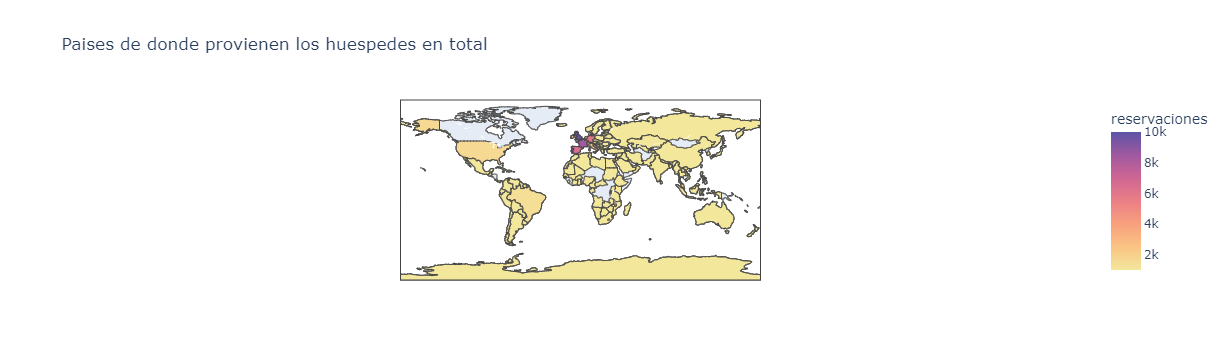

In [451]:
# Podemos observar de manera visual de donde provienen los huespedes.
NReservacion = df3['country'].value_counts().reset_index()
NReservacion.columns=['country','reservaciones']
mapa = make_subplots(rows=1, cols=2)
mapa = px.choropleth(NReservacion,
                    locations=NReservacion['country'],
                    color_continuous_scale="sunset",
                    range_color=(1000, 10000),
                    color=NReservacion['reservaciones'], 
                    hover_name="country", 
                    title="Paises de donde provienen los huespedes en total")


mapa.show()

La mayoria de estos huespedes provienen del continente europeo

### ¿Cuánto pagan los huéspedes por una habitación por noche en promedio?

In [403]:
#Se filtra la información por los dos hoteles que tiene la BD
CityHotel = df3[df3["hotel"] == 'City Hotel']
HotelResort = df3[df3["hotel"] == 'Resort Hotel'] 

In [407]:
CityHoteldf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46226 entries, 0 to 75165
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   index                           46226 non-null  object
 1   hotel                           46226 non-null  object
 2   is_canceled                     46226 non-null  object
 3   lead_time                       46226 non-null  object
 4   arrival_date_year               46226 non-null  object
 5   arrival_date_month              46226 non-null  object
 6   arrival_date_week_number        46226 non-null  object
 7   arrival_date_day_of_month       46226 non-null  object
 8   stays_in_weekend_nights         46226 non-null  object
 9   stays_in_week_nights            46226 non-null  object
 10  adults                          46226 non-null  object
 11  children                        46226 non-null  object
 12  babies                          46226 non-null

In [463]:
#Se obtene la media de ambos hoteles y de manera individual
avgtotal = df3['adr'].mean()
CityHotelAvg = CityHotel['adr'].mean()
HotelResortAvg = HotelResort['adr'].mean()
print('Promedio de habitación por noche por ambos hoteles es de:', round(avgtotal,2))
print('Promedio de habitación por noche en CityHotel es de:', round(CityHotelAvg,2))
print('Promedio de habitación por noche en HotelResort es de:', round(HotelResortAvg,2))

Promedio de habitación por noche por ambos hoteles es de: 99.99
Promedio de habitación por noche en CityHotel es de: 105.74
Promedio de habitación por noche en HotelResort es de: 90.79


### ¿Cómo varía el precio por noche durante el año?

In [337]:
std = df['adr'].std()
print('La variación del precio durante los 3 años es:', round(std,2))

year2015 = df[df['arrival_date_year'] == 2015]
yearstd2015 = year2015['adr'].std() 
print('La variación del precio durante el año 2015:', round(yearstd2015,2))

year2016 = df[df['arrival_date_year'] == 2016]
yearstd2016 = year2016['adr'].std()
print('La variación del precio durante el año 2016:', round(yearstd2016,2))

year2017 = df[df['arrival_date_year'] == 2017]
yearstd2017 = year2017['adr'].std()
print('La variación del precio durante el año 2017:', round(yearstd2017,2))

avg2 = df['adr'].mean()
coef = std/avg2
print('El coeficiente de variación de los 3 años es de:', round(coef,2))

La variación del precio durante los 3 años es: 50.54
La variación del precio durante el año 2015: 42.75
La variación del precio durante el año 2016: 49.96
La variación del precio durante el año 2017: 52.26
El coeficiente de variación de los 3 años es de: 0.5


In [338]:
variacion = df.groupby(["arrival_date_month", "arrival_date_year"])["adr"].std().reset_index()
variacion = Sort_Dataframeby_Month(df=variacion,monthcolumnname='arrival_date_month')
variacion

,arrival_date_month,arrival_date_year,adr
0,January,2016,26.014542
1,January,2017,29.202445
2,February,2016,26.657980
3,February,2017,32.642734
4,March,2016,83.734698
5,March,2017,32.201276
6,April,2016,32.096994
7,April,2017,40.288060
8,May,2016,37.798933
9,May,2017,44.146458


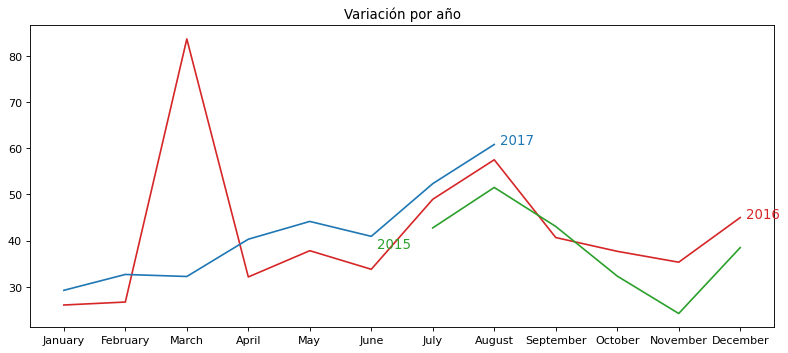

In [341]:
years = variacion['arrival_date_year'].unique()
years
plt.figure(figsize=(12,5), dpi= 80)
mycolors = ['tab:red', 'tab:blue', 'tab:green']
for i, y in enumerate(years):
    plt.plot('arrival_date_month', 'adr', data=variacion.loc[variacion.arrival_date_year==y, :], color=mycolors[i], label=y)
    plt.text(variacion.loc[variacion.arrival_date_year==y, :].shape[0]-.9, variacion.loc[variacion.arrival_date_year==y, 'adr'][-1:].values[0], y, fontsize=12, color=mycolors[i])
    
plt.title("Variación por año")
plt.show()

In [465]:
#La variación del precio durante los meses 
VariacionMes = df.groupby(["arrival_date_month"])["adr"].std().reset_index()
Sort_Dataframeby_Month(df=VariacionMes,monthcolumnname='arrival_date_month')

,arrival_date_month,adr
0,January,28.373005
1,February,30.092552
2,March,63.101354
3,April,38.193729
4,May,42.875641
5,June,38.773671
6,July,52.064455
7,August,61.657384
8,September,43.004095
9,October,36.281047


### ¿Cuáles son los meses más ocupados?

In [466]:
#Los meses mas ocupados para los huespedes de ambos hoteles:
meses = df3.groupby(['arrival_date_month']).size()
meses.sort_values(ascending = False)

arrival_date_month
August       8638
July         7919
May          7114
October      6914
March        6645
April        6565
June         6404
September    6392
February     5372
November     4672
December     4409
January      4122
dtype: int64

In [471]:
CityHotel = df[df["hotel"] == 'City Hotel']
HotelResort = df[df["hotel"] == 'Resort Hotel']

In [476]:
#Ocupación de los huespedes por City Hotel
mesesch = CityHotel.groupby(['arrival_date_month']).size()
mesesch.sort_values(ascending = False)

arrival_date_month
August       8983
May          8232
July         8088
June         7894
October      7605
April        7480
September    7400
March        6458
February     4965
November     4357
December     4132
January      3736
dtype: int64

In [475]:
#Ocupación de los huespedes de Hotel Resort 
meseshr = HotelResort.groupby(['arrival_date_month']).size()
meseshr.sort_values(ascending = False)

arrival_date_month
August       4894
July         4573
April        3609
May          3559
October      3555
March        3336
September    3108
February     3103
June         3045
December     2648
November     2437
January      2193
dtype: int64

 los 3 meses mas ocupados son agosto, julio y mayo, siendo la temporada alta causada por vacaciones escolares, puentes, asuetos y festividades tales como Semana Santa 

### ¿Cuánto tiempo se queda la gente en los hoteles (noches)?

In [242]:
#Se filtra por la reservación de estatus que cuente por check-out
checkout = (df3['reservation_status'] == 'Check-Out')
df4 = df3[checkout]

In [244]:
df4

,index,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,Day_Dif
0,326,City Hotel,0,199,2016,July,30,23,3,6,...,0.0,0,Transient,94.51,0,2,Check-Out,2016-01-08,2016-07-23,-197
1,327,City Hotel,0,206,2016,July,30,23,14,34,...,0.0,0,Transient-Party,0.00,0,1,Check-Out,2016-09-09,2016-07-23,48
2,343,City Hotel,0,205,2016,July,31,24,2,2,...,0.0,0,Transient,90.95,0,0,Check-Out,2016-07-28,2016-07-24,4
3,352,City Hotel,0,206,2016,July,31,25,1,0,...,0.0,0,Transient,96.30,0,2,Check-Out,2016-07-26,2016-07-25,1
4,380,City Hotel,0,206,2016,July,31,25,1,4,...,0.0,0,Transient,90.95,0,0,Check-Out,2016-07-30,2016-07-25,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75161,119314,City Hotel,0,204,2016,July,29,12,0,4,...,0.0,0,Transient-Party,81.81,0,0,Check-Out,2016-07-16,2016-07-12,4
75162,119316,City Hotel,0,201,2016,July,29,12,0,4,...,0.0,0,Transient-Party,81.82,0,0,Check-Out,2016-07-16,2016-07-12,4
75163,119317,City Hotel,0,214,2016,July,29,12,0,4,...,0.0,0,Transient-Party,81.50,0,1,Check-Out,2016-07-16,2016-07-12,4
75164,119344,City Hotel,0,193,2016,July,29,13,2,7,...,0.0,0,Transient,90.95,0,0,Check-Out,2016-07-22,2016-07-13,9


In [251]:
#Se suman las noches entre semana y las de fin de semana para saber el total de noches que se quedaron los huespedes
df4['Noches'] = df4['stays_in_week_nights'] + df4['stays_in_weekend_nights']

In [339]:
#Se obtiene cuantas noches en promedio se quedan las personas en el hotel
PromedioNoche = df4['Noches'].mean()
print('Las personas se quedan', round(PromedioNoche,2), 'días en promedio' )

Las personas se quedan 3.39 días en promedio


### Reservas por segmento de mercado

In [127]:
segmentom = df.groupby(['market_segment']).size()
segmentom.sort_values(ascending = False)

market_segment
Online TA        56477
Offline TA/TO    24219
Groups           19812
Direct           12607
Corporate         5295
Complementary      743
Aviation           237
dtype: int64

### ¿Cuántas reservas se cancelaron?



In [135]:
cancelacion = df['is_canceled'] == 1
dfcancelacion = df[cancelacion]
cancelaciones = dfcancelacion['is_canceled'].count()
print('Se han realizaron ', cancelaciones, ' cancelaciones en total')



Se han realizaron  44224  cancelaciones


### ¿Qué mes tiene el mayor número de cancelaciones?

In [136]:
mescancelado = dfcancelacion.groupby(['arrival_date_month']).size()
mescancelado.sort_values(ascending = False)

arrival_date_month
August       5239
July         4742
May          4677
June         4535
April        4524
October      4246
September    4116
March        3149
February     2696
December     2371
November     2122
January      1807
dtype: int64